In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('walkrun_clean.csv',index_col=0)
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_time
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


In [3]:
df.tail()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_time
88583,1,-0.3145,-0.5619,0.2554,-1.4393,0.1370,-1.5961,2017-07-17 20:16:02.884990990
88584,1,0.2041,0.4117,-0.1134,0.8280,0.8089,1.9331,2017-07-17 20:16:03.285188019
88585,1,-2.9406,0.4090,0.0523,2.2648,0.2342,3.7748,2017-07-17 20:16:03.485148012
88586,1,-0.0219,-0.5711,0.1658,0.2210,-1.5538,0.6392,2017-07-17 20:16:03.684989988
88587,1,-2.1825,0.1876,0.0430,-2.2937,-0.6059,-0.6293,2017-07-17 20:16:03.851119750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88588 entries, 0 to 88587
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity        88588 non-null  int64  
 1   acceleration_x  88588 non-null  float64
 2   acceleration_y  88588 non-null  float64
 3   acceleration_z  88588 non-null  float64
 4   gyro_x          88588 non-null  float64
 5   gyro_y          88588 non-null  float64
 6   gyro_z          88588 non-null  float64
 7   date_time       88588 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 6.1+ MB


In [5]:
df = df.drop(["date_time"],axis=1)

In [6]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity        88588 non-null  int64  
 1   acceleration_x  88588 non-null  float64
 2   acceleration_y  88588 non-null  float64
 3   acceleration_z  88588 non-null  float64
 4   gyro_x          88588 non-null  float64
 5   gyro_y          88588 non-null  float64
 6   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.4 MB


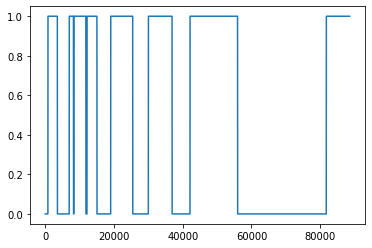

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.activity)

In [9]:
df.shape

(88588, 7)

In [10]:
88588*0.9

79729.2

# since we are dealing with sequential models, random splitting doesnt work

# so we need to time based splitting for train and test

In [11]:
train_data = df[:79720]
test_data = df[79720:]

In [22]:
train_data.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [12]:
train_data.shape

(79720, 7)

In [13]:
test_data.shape

(8868, 7)

### Here we are trying to use past 50 data to predict the new data i.e look back value of 50.
SO, THE MODEL NEEDS PAST 50 DATA TO PREDICT THE PRESENT OR FUTURE ACTIVITY.

# SO WE NEED TO RESHAPE THE DATA ACCORDING (50,6)

In [46]:
#CREATING sequencial data for lstms

X_train = []
y_train = []

for i in range(50, 79720):
    X_train.append(train_data.iloc[i-50:i,1:])
    y_train.append(train_data.activity[i])

In [47]:
import numpy as np
X_train = np.array(X_train)

In [48]:
X_train.shape

(79670, 50, 6)

In [49]:
X_train = X_train.reshape(X_train.shape[0], 50, 6)

In [50]:
X_train.shape

(79670, 50, 6)

In [60]:
y_train = np.array(y_train)

In [61]:
y_train.shape

(79670,)

### now the X_data is in shape of (79670,50,6)

* so there are total of 79670 datapoints with shape (50,6)

            * where 6 is the number of features used

            * where 50 is the number of past data needed

### Similarly for Y_data

* FOR EVERY 50 PAST VALUES OF X THERE SHOULD BE A Y VALUE

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [57]:
model = Sequential()
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32, input_shape=(50, 6)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 32)                4992      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 32)                4992      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Training the model
model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=30)

Epoch 1/30
2490/2490 [==============================] - 28s 9ms/step - loss: 0.0074
Epoch 2/30
2490/2490 [==============================] - 27s 11ms/step - loss: 0.0015
Epoch 3/30
2490/2490 [==============================] - 22s 9ms/step - loss: 0.0011
Epoch 4/30
2490/2490 [==============================] - 21s 8ms/step - loss: 9.1448e-04
Epoch 5/30
2490/2490 [==============================] - 21s 8ms/step - loss: 7.5398e-04
Epoch 6/30
2490/2490 [==============================] - 20s 8ms/step - loss: 7.4636e-04
Epoch 7/30
2490/2490 [==============================] - 20s 8ms/step - loss: 6.6636e-04
Epoch 8/30
2490/2490 [==============================] - 20s 8ms/step - loss: 6.2519e-04
Epoch 9/30
2490/2490 [==============================] - 19s 8ms/step - loss: 5.6773e-04
Epoch 10/30
2490/2490 [==============================] - 19s 8ms/step - loss: 5.5237e-04
Epoch 11/30
2490/2490 [==============================] - 21s 8ms/step - loss: 5.4136e-04
Epoch 12/30
2490/2490 [==================

In [67]:
model.history.history["loss"]

[0.007390026934444904,
 0.0015368222957476974,
 0.0010531835723668337,
 0.0009144790237769485,
 0.0007539780344814062,
 0.0007463599904440343,
 0.0006663594976998866,
 0.0006251874729059637,
 0.0005677322624251246,
 0.0005523681757040322,
 0.0005413629696704447,
 0.000524236704222858,
 0.0005432072794064879,
 0.00048751270514912903,
 0.0004914240562357008,
 0.0004556056228466332,
 0.00048074653022922575,
 0.00046582912909798324,
 0.0004564250120893121,
 0.0005375409964472055,
 0.00040739079122431576,
 0.0003823060542345047,
 0.0004063403466716409,
 0.00039348588325083256,
 0.0003801336861215532,
 0.0004010828270111233,
 0.0003693759208545089,
 0.0004107331042177975,
 0.0003639852802734822,
 0.00037914718268439174]

# Plotting the accuracy

In [68]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'LOSS PLOT')

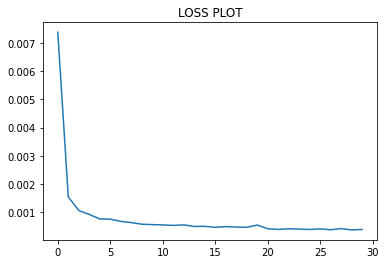

In [70]:
plt.plot(model.history.history["loss"])
plt.title("LOSS PLOT")

# Manually testing the model for predictions

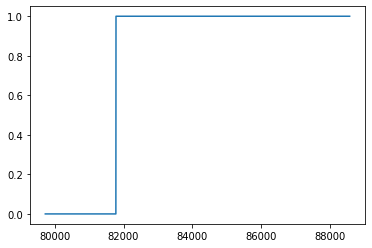

In [72]:
plt.plot(y_test)

###  since the Testing data should be same as the shape of training data

we need to reshape the data similarly

In [74]:
test_data.shape

(8868, 7)

In [76]:
train_data[-50:]

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
79670,0,0.3605,-1.3903,-0.0751,-1.2553,-1.1000,-1.4261
79671,0,0.4173,-1.0257,-0.0496,0.2283,0.8497,1.7944
79672,0,0.1392,-0.7511,-0.0582,1.1432,-0.2227,1.8020
79673,0,0.4475,-1.0380,-0.2802,0.4798,0.6652,1.3596
79674,0,0.5020,-1.0712,-0.2774,-0.4661,-1.1742,-1.6174
79675,0,0.3608,-0.8310,-0.0593,-0.4919,-0.7525,-2.9269
79676,0,0.3005,-1.0578,0.0464,-0.4411,0.8135,0.0454
79677,0,0.4035,-1.0898,-0.1158,0.8011,-1.0263,2.9432
79678,0,0.3770,-0.8138,-0.1346,0.5468,0.4809,1.0880
79679,0,0.6059,-1.3421,-0.3215,0.2492,-0.9078,0.3992


In [77]:
last_50_train  = train_data[-50:]

In [78]:
new_test = np.concatenate((last_50_train, test_data), axis=0)

In [79]:
new_test.shape

(8918, 7)

In [82]:
new_test = pd.DataFrame(new_test)

In [83]:
new_test.head()

,0,1,2,3,4,5,6
0,0.0,0.3605,-1.3903,-0.0751,-1.2553,-1.1000,-1.4261
1,0.0,0.4173,-1.0257,-0.0496,0.2283,0.8497,1.7944
2,0.0,0.1392,-0.7511,-0.0582,1.1432,-0.2227,1.8020
3,0.0,0.4475,-1.0380,-0.2802,0.4798,0.6652,1.3596
4,0.0,0.5020,-1.0712,-0.2774,-0.4661,-1.1742,-1.6174


In [86]:
#CREATING sequencial data for lstms

X_test = []
y_test = []

for i in range(50, 8918):
    X_test.append(new_test.iloc[i-50:i,1:])
    y_test.append(new_test[0].iloc[i])

In [88]:
X_test = np.array(X_test)

In [89]:
X_test.shape

(8868, 50, 6)

In [90]:
y_test = np.array(y_test)

In [91]:
y_test.shape

(8868,)

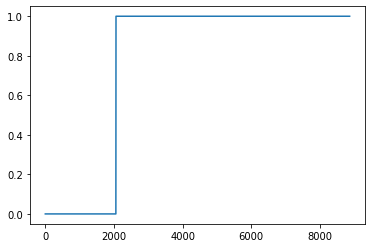

In [92]:
plt.plot(y_test)

In [129]:
y_predict = model.predict(X_test)

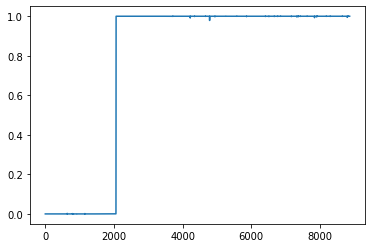

In [94]:
plt.plot(y_predict)

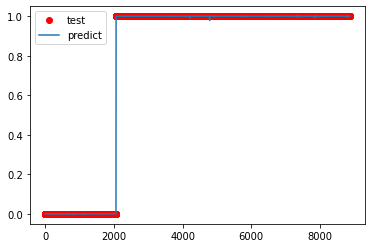

In [99]:
plt.plot(y_test,"ro")
plt.plot(y_predict)
plt.legend(['test', 'predict'])

# Conclusion

After testing the model is performing well. the actual class and predicted class are almost same.